In [1]:

import numpy as np
import matplotlib.pyplot as plt
%pip install opencv-python # Required to import cv2 !!!
!pip install tabulate
import cv2
import os
import time

import pandas as pd




import scipy as sc

from tabulate import tabulate


Note: you may need to restart the kernel to use updated packages.


<h2> The Powerful Applications of Non-negative Matrix Factorization </h2>

One of the problems that the field of machine learning is trying to solve is the rapidly increasing amounts of data in the world. This involves compressing data to occupy less space, while preserving the original message. One of the techniques used to accomplish this is dimensionality reduction. This is a wide field, containing many algorithms and methods. We will investigate the uses of one of these methods, non-negative matrix factorization, hereby referred to as NMF. First we describe the method mathematically, then we apply the method on a dataset of images.

In the first part we look at the mathematical properties of the algorithm we use to implement the method, and how it affects smaller matrices. This part we go through step by step, to lay the groundwork. In the second part we consider bigger topics such as dimensionality reduction and denoising, this will be a more fluent text.


<h2> Implementing the NMF-algorithm</h2>

An important part of non-negative matrix factorization is that the constructed matrices are and stay non-negative. Lee and Seung’s multiplicative update rule assures this. 


To show this first we assume that $A$ is a non-negative matrix, and we initiate $W$ and $H$ as positive. We calculate the next matrix $W_{k+1} $ and $H_{k+1}$:

$$ (H_{k+1})_{ij} = (H_{k})_{ij} \cdot \frac{(W_{k}^{T} A)_{ij}}{(W_{K}^TW_{k}H_{K})_{ij}} $$

$$ (W_{k+1})_{ij} = (W_{k})_{ij} \cdot \frac{(AH_{k+1}^{T})_{ij}}{(W_{k}H_{k+1}H_{k+1}^{T})_{ij}} $$

Where $H_{ij}$ is the $i$-th row and the $j$-th column of the H matrix.

We see that when calculating the next step the only operations that we use are division and multiplication. Division and multiplication of non-negative numbers will always yield non-negative numbers. Since our original matrices are non-negative, $W_k$ and $H_K$ will always stay non-negative.

From equation (15) we have that $(H_{k+1})_{ij}=(H_k)_{ij}\cdot{\frac{(W_k^T A)_{ij}}{(W_k^TW_kH_k)_{ij}}}$. If ${\frac{W_k^T A}{W_k^TW_kH_k}}$ is just a just a matrix of ones we will have $(H_{k+1})_{ij}=(H_k)_{ij}\cdot 1$. As well if $W_kH_k=A$ we will get ${\frac{W_k^T A}{W_k^TW_kH_k}}=\frac{W_k^TA}{W_k^TA}=1$ and aqquire the same result.


Setting $H_0$ and $W_0$ to zero will cause us to divide by zero in the iterations, which clearly makes the iterations stop instantly

Now we are ready to implement the NMF.
<h2> NMF-algorithm </h2>
Non-negative matrix factorization is a simple algorithm for compressing data stored in a non-negative matrix. The algorithm breaks down the data into two matrices, $W$ and $H$, that multiplied with each other gives an approximate reconstruction of the original matrix. $W$ has dimension $n$ x $d$ and $H$ has dimension $d$ x $m$. $d$ is one of the parameters of the function, and it is one we will be varying frequently throughout the project. If the matrix har order $r$ less than $n$ and $m$, we want $d$ to be close to $r$ to remove the redundant information in the matrix. Hopefully lowering the number of total components without losing a significant amount of information.


To calculate the error between the original matrix and the reconstructed matrix we use the Frobenius norm. The formula for this is simply 
$ ||A||_F=\sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}|a_{ij}|^2} $.  

In [2]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    The function takes in a matrix as well as the size d of the approximation matrices.
    By using Lee and Seung’s multiplicative update rule for NMF we iterate such that
    H and W converge towards an acceptable approximation.
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """
    m,n=len(V),len(V[0])
    if seed != 0:
        np.random.seed(seed)
    W=np.random.uniform(0,1,(m,d))  #Making matrices W and H of correct sizes with values between 0 and 1
    W=np.sqrt(V.mean()/d)*W         #Scaling to the size of input matrix
    H=np.random.uniform(0,1,(d,n))
    H=np.sqrt(V.mean()/d)*H
    error_list=np.zeros(maxiter)
    for k in range(maxiter):
        H=H*(W.T @ V)/(W.T @ W @ H+delta) 
        W=W*(V @ H.T)/(W @ H @ H.T+delta) 
        error_list[k]=np.linalg.norm(V-np.dot(W,H),'fro')
    return W, H, error_list


A1=np.array([[1,0],[0,1]])
A2=np.array([[1,2],[1,1],[1,2]])
A3=np.array([[2,1,1],[2,1,1],[1,1,2]])
A4=np.array([[2,1,0],[1,2,3],[0,3,3]])

t=np.linspace(0,1000,1000)  #List to represent number of iterations



<h2> Testing NMF 

In [3]:
def func_1d():
    W1,H1, error_list=NMF(A1, 1, delta = 1e-9, maxiter = 1000, seed = 0)
    WH1 = np.matmul(W1,H1)
    print('d=1\nA1 decomposition:\nW:\n',tabulate(W1,tablefmt="fancy_grid"),'\nH:\n',tabulate(H1,tablefmt="fancy_grid"), '\nWH: \n',tabulate(WH1, tablefmt="fancy_grid"),'\nError: ', error_list[-1],'\n' )



    W2,H2, error_list=NMF(A2, 1, delta = 1e-9, maxiter = 1000, seed = 0)
    WH2 = np.matmul(W2,H2)
    print("A2 decomposition:\nW:\n",tabulate(W2,tablefmt="fancy_grid"),'\nH:\n',tabulate(H2,tablefmt="fancy_grid"), '\nWH: \n',tabulate(WH2, tablefmt="fancy_grid"),'\nError: ', error_list[-1],'\n')
func_1d()
func_1d()


d=1
A1 decomposition:
W:
 ╒═══════════╕
│ 0.0504222 │
├───────────┤
│ 0.318756  │
╘═══════════╛ 
H:
 ╒══════════╤═════════╕
│ 0.484142 │ 3.06061 │
╘══════════╧═════════╛ 
WH: 
 ╒═══════════╤══════════╕
│ 0.0244115 │ 0.154323 │
├───────────┼──────────┤
│ 0.154323  │ 0.975589 │
╘═══════════╧══════════╛ 
Error:  0.9999999999999999 

A2 decomposition:
W:
 ╒══════════╕
│ 0.65659  │
├──────────┤
│ 0.400728 │
├──────────┤
│ 0.65659  │
╘══════════╛ 
H:
 ╒═════════╤════════╕
│ 1.67569 │ 2.9596 │
╘═════════╧════════╛ 
WH: 
 ╒══════════╤═════════╕
│ 1.10025  │ 1.94324 │
├──────────┼─────────┤
│ 0.671499 │ 1.18599 │
├──────────┼─────────┤
│ 1.10025  │ 1.94324 │
╘══════════╧═════════╛ 
Error:  0.41115460006510884 

d=1
A1 decomposition:
W:
 ╒══════════╕
│ 0.145455 │
├──────────┤
│ 0.205718 │
╘══════════╛ 
H:
 ╒═════════╤═════════╕
│ 2.29146 │ 3.24083 │
╘═════════╧═════════╛ 
WH: 
 ╒══════════╤══════════╕
│ 0.333303 │ 0.471394 │
├──────────┼──────────┤
│ 0.471394 │ 0.666697 │
╘══════════╧══════════╛

For $A1$ $H$ and $W$ will not change at all after the first iteration, and the error will also always be 1 after the first iteration. Proofs:

Assume $W_0 = \begin{pmatrix} a \\ b \end{pmatrix}, H_0 = \begin{pmatrix} c & d \end{pmatrix} $

Then $H_1 = H_0 * (W^T_k A) / (W^T_k W_k H_k) = \begin{pmatrix} \frac{a}{a^2+b^2} & \frac{b}{a^2+b^2} \end{pmatrix}  $ after some calculation. 

Similarly, we get $W_1 = W_0 * (AH^T_{k+1}) / (W_k H_{k+1} H^T_{k+1}) = \begin{pmatrix} a \\ b \end{pmatrix}  $

Which means that $W_1 = W_0$. We also note that the value of $H_1$ only depended on $W_0$. From this we can se that $H_2$ will equal $H_1$, since the value of $W$ has not changed. Likewise $W_2 = W_1$ since $H$ does not change, and so forth.

We can show that the error has to be 1 by calculating the Frobenius norm of $A - WH$:

$ WH = \begin{pmatrix} a \\ b \end{pmatrix}  \begin{pmatrix} \frac{a}{a^2+b^2} & \frac{b}{a^2+b^2} \end{pmatrix}  = \begin{pmatrix} \frac{a^2}{a^2+b^2} & \frac{ab}{a^2+b^2} \\ \frac{ab}{a^2+b^2} & \frac{b^2}{a^2+b^2}\end{pmatrix}  $


$|| {A - WH} || = \begin{Vmatrix} 1- \frac{a^2}{a^2+b^2} & \frac{-ab}{a^2+b^2} \\ \frac{-ab}{a^2+b^2} & 1-\frac{b^2}{a^2+b^2} \end{Vmatrix}   = \begin{Vmatrix} \frac{b^2}{a^2+b^2} & \frac{-ab}{a^2+b^2} \\ \frac{-ab}{a^2+b^2} & \frac{a^2}{a^2+b^2} \end{Vmatrix}       =  \frac{1}{a^2+b^2} \sqrt{a^4+2a^2 b^2 +b^4} = \frac{1}{a^2+b^2} \cdot (a^2 + b^2) = 1 $




 




For $A2$ we see that we always get the same WH-matrix and error, but that $W$ and $H$ differ. In other words, $W$ and $H$ are unique for different simulations, but not $WH$. This and the $A1$-decompostion are examples of the NMF not having unique solutions.

In [4]:

W,H, error_list=NMF(A1, 2, delta = 1e-9, maxiter = 1000, seed = 0)

print('d=2\nA1: \nW:\n',tabulate(W,tablefmt="fancy_grid"),'\nH:\n',tabulate(H,tablefmt="fancy_grid"),'\nWH:\n', tabulate(W @ H,tablefmt="fancy_grid"),'\nError: ', error_list[-1], '\n')


W,H, error_list=NMF(A2, 2, delta = 1e-9, maxiter = 1000, seed = 0)
print("A2:\nW:\n",tabulate(W,tablefmt="fancy_grid"),'\nH:\n',tabulate(H,tablefmt="fancy_grid"),'\nWH:\n', tabulate(W @ H,tablefmt="fancy_grid"), '\nError: ', error_list[-1], '\n')

print(np.linalg.matrix_rank(A2))



d=2
A1: 
W:
 ╒═════════╤══════════╕
│ 0       │ 0.254356 │
├─────────┼──────────┤
│ 0.40455 │ 0        │
╘═════════╧══════════╛ 
H:
 ╒════════╤═════════╕
│ 0      │ 2.47188 │
├────────┼─────────┤
│ 3.9315 │ 0       │
╘════════╧═════════╛ 
WH:
 ╒═══╤═══╕
│ 1 │ 0 │
├───┼───┤
│ 0 │ 1 │
╘═══╧═══╛ 
Error:  4.778677324993843e-10 

A2:
W:
 ╒═══════════╤══════════╕
│ 0.645282  │ 0.449789 │
├───────────┼──────────┤
│ 0.0632651 │ 0.625367 │
├───────────┼──────────┤
│ 0.645282  │ 0.449789 │
╘═══════════╧══════════╛ 
H:
 ╒══════════╤═════════╕
│ 0.468107 │ 2.13539 │
├──────────┼─────────┤
│ 1.5517   │ 1.38303 │
╘══════════╧═════════╛ 
WH:
 ╒═══╤═══╕
│ 1 │ 2 │
├───┼───┤
│ 1 │ 1 │
├───┼───┤
│ 1 │ 2 │
╘═══╧═══╛ 
Error:  9.307989458526551e-10 

2


For A1 its clear that the error can get arbitrarily close to 0. As for example W = $\begin{pmatrix} 0 & a \\ b & 0 \end{pmatrix}$, H = $\begin{pmatrix} 0 & 1/b \\ 1/a & 0 \end{pmatrix}$ gives $WH = A_1$ The same thing seems to apply to A2, as it has a similarly low error value. We can check that there exists W and H such that $WH = A$ by brief trial and error. We can for example get $$W = \begin{pmatrix} 0.3 & 0.2 \\ 0.1 & 0.4 \\ 0.3 & 0.2 \end{pmatrix} and $$ and $H$  = \begin{pmatrix}  2 & 6 \\ 2 & 1 \end{pmatrix}

In conclusion the low errors are reasonable as both matrices have actual solutions that we can approach.


We find the ranks of A3 and A4 using np.linalg.matrix_rank
Rank of A3:  2 
Rank of A4:  3


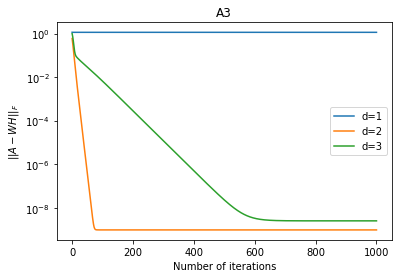

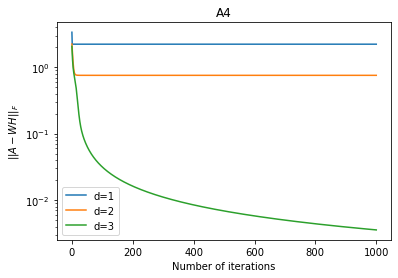

In [5]:


print("We find the ranks of A3 and A4 using np.linalg.matrix_rank")
rankA3=np.linalg.matrix_rank(A3)
rankA4=np.linalg.matrix_rank(A4)


print('Rank of A3: ',rankA3,'\nRank of A4: ',rankA4)

W_d1,H_d1, error_list_d1=NMF(A3, 1, delta = 1e-9, maxiter = 1000, seed = 0)
W_d2,H_d2, error_list_d2=NMF(A3, 2, delta = 1e-9, maxiter = 1000, seed = 0)
W_d3,H_d3, error_list_d3=NMF(A3, 3, delta = 1e-9, maxiter = 1000, seed = 0)
plt.plot(t,error_list_d1, label='d=1')
plt.plot(t,error_list_d2, label='d=2')
plt.plot(t,error_list_d3, label='d=3')
plt.legend()
plt.title('A3')
plt.xlabel('Number of iterations')
plt.ylabel('$||A-WH||_{F}$')
plt.semilogy()
plt.show()

W_d1,H_d1, error_list_d1=NMF(A4, 1, delta = 1e-9, maxiter = 1000, seed = 0)
W_d2,H_d2, error_list_d2=NMF(A4, 2, delta = 1e-9, maxiter = 1000, seed = 0)
W_d3,H_d3, error_list_d3=NMF(A4, 3, delta = 1e-9, maxiter = 1000, seed = 0)
plt.plot(t,error_list_d1, label='d=1')
plt.plot(t,error_list_d2, label='d=2')
plt.plot(t,error_list_d3, label='d=3')
plt.legend()
plt.semilogy()
plt.title('A4')
plt.xlabel('Number of iterations')
plt.ylabel('$||A-WH||_{F}$')
plt.show()

The error for A4 decreases as $d$ increases, whereas matrix A3 has faster convergence for $d=2$. This shows that the convergence is fastest when $ d$ is equal to the rank of the matrix, which is what we expected. The error is also strictly decreasing or constant for each iteration, satisfying equation 17: $||A_{k+1}-W_{k+1}H_{k+1}||_F\geq||A_{k}-W_{k}H_{k}||_F$.

<h2> NMF to compromize data from images </h2>


The NMF-algorithm works as it is supposed to, and is ready to be used on a data set containing images. The images is made up of pixels containing RGB-values, stored in a matrix. Where each value represent a color. We will in this project assume each color channel has a vale between 0 and 1, which means that the matrix is a non-negative matrix.

The images we use in the project comes from the CryptoPunks dataset. There are 10.000 algorithmically generated CryptoPunks. They are generated from a pool of different traits like glasses, hairstyles, earring, eyes etc. Each similar trait is placed in the same pixels for all CryptoPunks, that is why CryptoPunks are useful for testing the NMF. The NMF will hopefully store these traits, so that for example each blue hat is only stored once, instead of in every CryptoPunk.


First we need to upload the images, we use the handed out code.

In [6]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 1000 #Var egentlig 500, men kjøretiden vår klarer 1000

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(faces.shape)


(24, 24, 4, 1000)


We load the images in a $24 \times 24 \times 4 \times N $ array. Then we store the opacity channel in a $ 24 \times 24 \times N $ array. We reshape the remaining $24\times 24 \times 3 \times N $ into a matrix $A$ $1728 \times N$. Then it is possible to use NMF on A.

We also need a way to present the images. For this we again use the handed out code.

In [7]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input: 
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams


                                  CryptoPunks


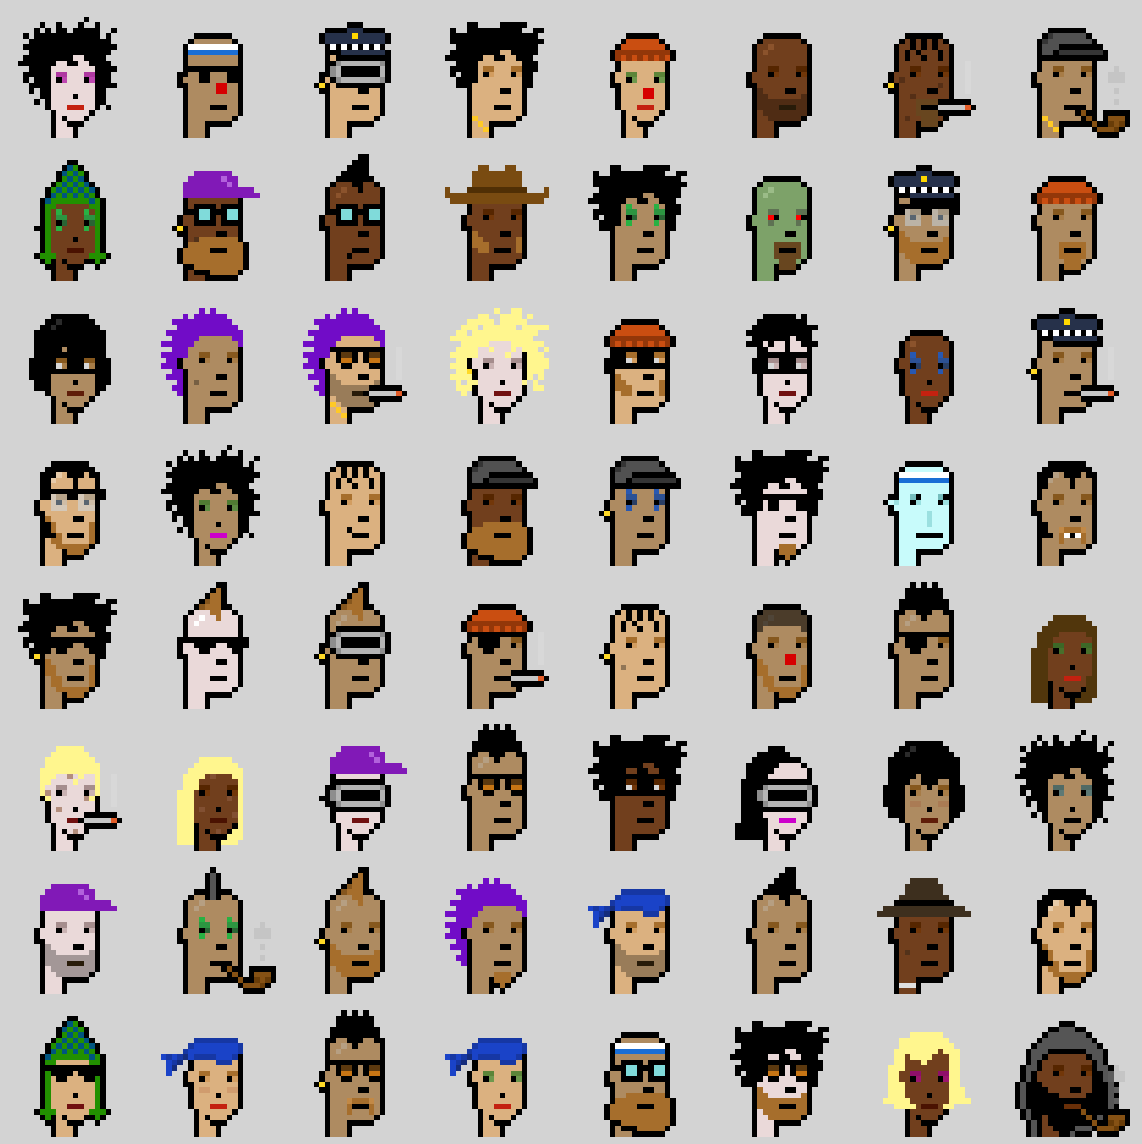

In [27]:
# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
print("                                  CryptoPunks")
plotimgs(faces, 8, filename="punks.png")

A $8 \times 8$ plot of random chosen CyberPunks. Note that eventhough we only printet 64 of the CyberPunks, many traits are shared.

In [9]:
# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)


rank:  421


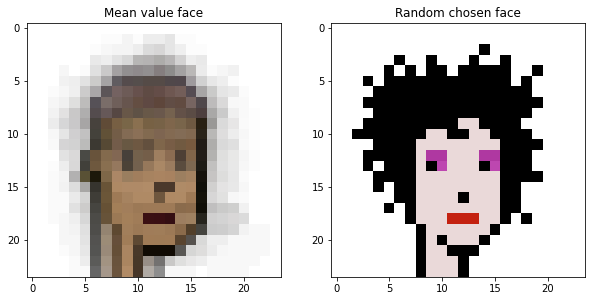

In [10]:
#2b
faces_mean = np.mean(faces, axis = -1) #Caluclate the mean values for each pixel
print("rank: ", np.linalg.matrix_rank(faces_reshaped)) #calculating the rank for the matrix


fig, (ax1, ax2) = plt.subplots(1, 2) #plotting


ax1.set_title("Mean value face")
ax2.set_title("Random chosen face")
ax1.imshow(faces_mean)
ax2.imshow(faces[:,:,:, 0])
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()




We see from the plot that all cryptopunks have som shared features, while certain areas have high variation. Eyes, nose and mouth are clearly visible in the mean value face, as well as the jaw and the right side of the face. These are features that are shared by almost all cryptopunks (to some degree). We note that the randomly chosen face has all these features .
We see more variance in the upper part of the mean image, where hair and headwear is. We can except more variance in color and size in this area of the images in the dataset.

For all cryptopunks there are 1-3 pixels along the edges that have zero opacity

The rank of the matrix containing the images is of rank 437. Mathemathically, this means there are 437 linearly independent columns/rows in our 1728 x 1000 matrix.  Consequently all the images in our dataset can be written as a linear combination of 437 specific images.

We are now ready to use the NMF-algorithm on the CryptoPunk dataset.

In [11]:
# 2c
d1=16 #Setting d values
d2=32
d3=64
d4=128
d5=256
d6=512



W_16, H_16, diff_16 = NMF(faces_reshaped,d1) #Calculating W and H for different d values
W_32, H_32, diff_32 = NMF(faces_reshaped,d2) 
W_64, H_64, diff_64 = NMF(faces_reshaped,d3)
W_128, H_128, diff_128 = NMF(faces_reshaped,d4)
W_256, H_256, diff_256 = NMF(faces_reshaped,d5)
W_512, H_512, diff_512 = NMF(faces_reshaped,d6)


W_64[W_64 > 1.0] = 1.0 #Sets all pixelvalues > 1.0 to 1.0
W_32[W_32 > 1.0] = 1.0
W_128[W_128 > 1.0] = 1.0
W_16[W_16 > 1.0] = 1.0

We compute the different W- and H-vectors early in the code to save computing time, instead of defining them several times.

<a id = 'orig' ></a>

                                 W matrix, for d = 64


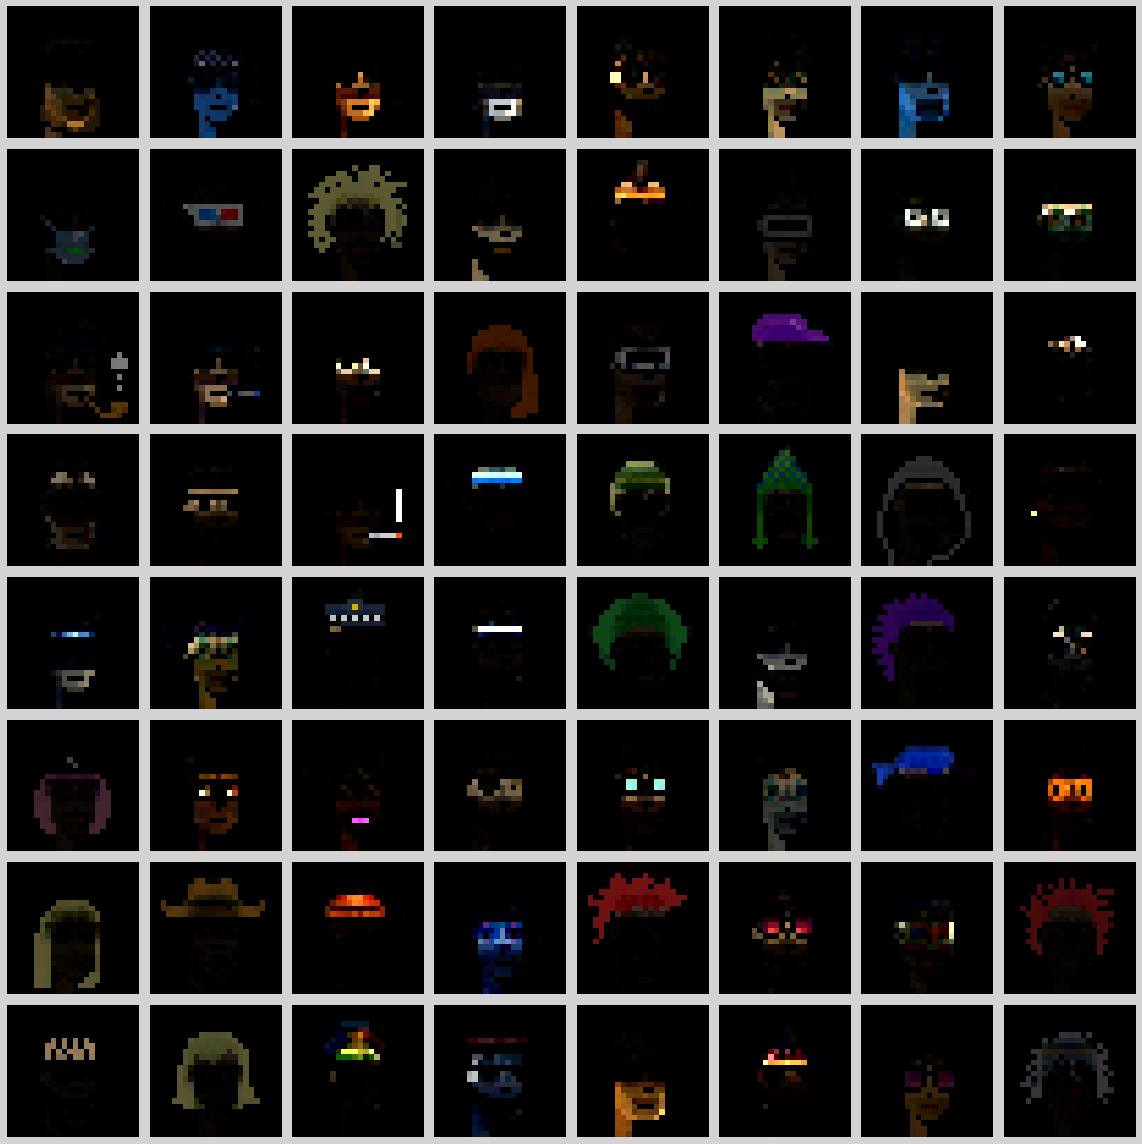

                                 W matrix, for d = 16


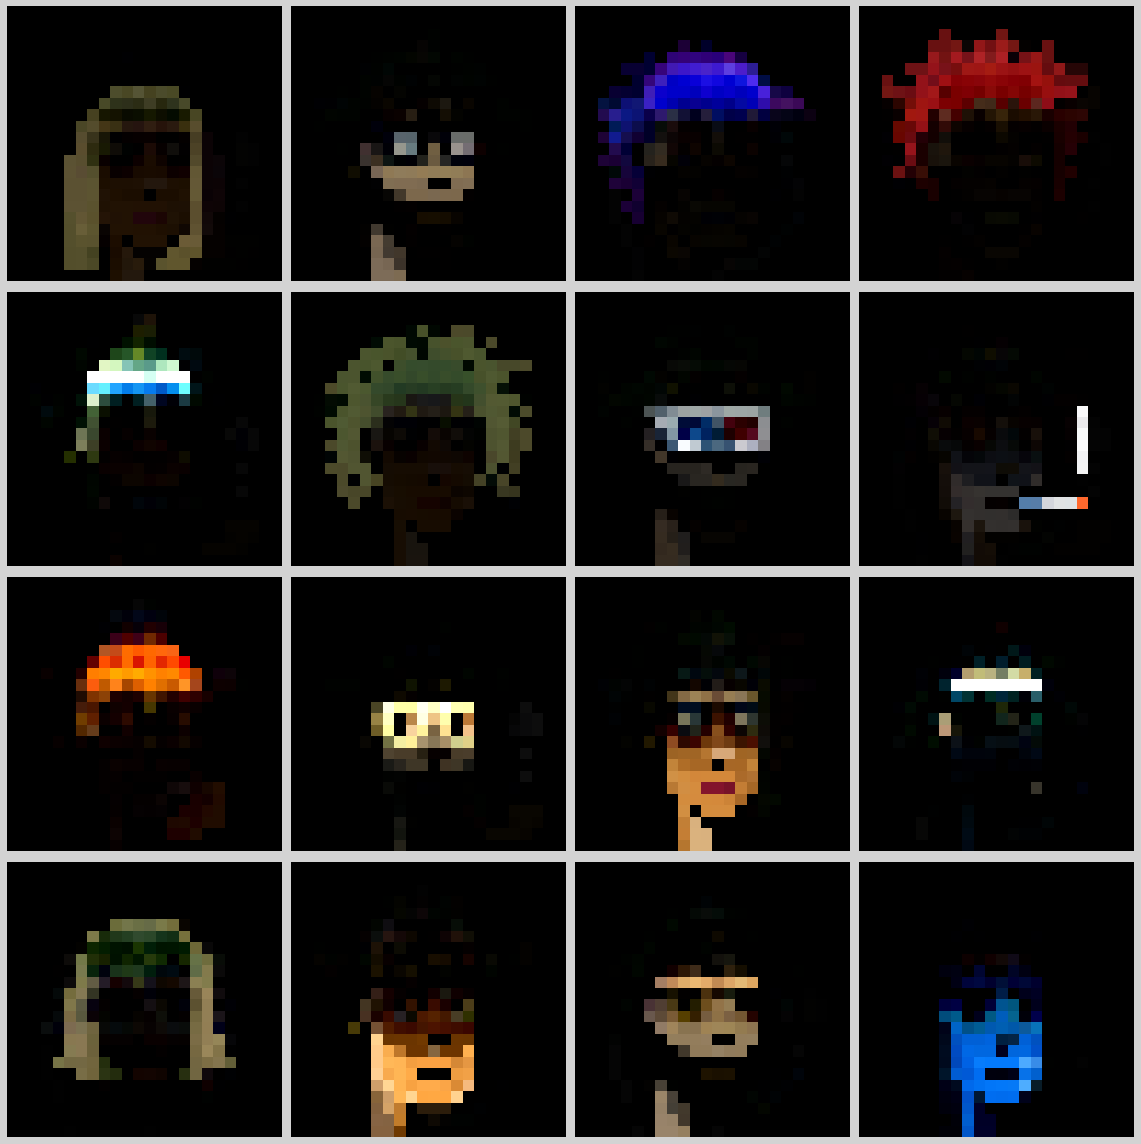

In [30]:
print('                                 W matrix, for d = 64'  )

plotimgs(W_64.reshape(24,24,3,d3), 8, filename="punks.png") # plotting for d =64

print('                                 W matrix, for d = 16'  )
plotimgs(W_16.reshape(24,24,3,d1), 4, filename="punks.png") # plotting for d =16 for comparison

Here we have plotted the columns of W after applying NMF with $d = 64$ and $ d = 16$. We now see the ability of NMF to notice clusters in the dataset, here represented by particular traits shared by the cryptopunks. The $W$ matrix stores the features, while the $H$ matrix stores the 'weight' of each feature for a particular cryptopunk. We see features like hairstyle, hats and glasses. We also see face types of different color and shape. 

We see similar results with $d = 16$, but here the features are bigger, and sometimes contain several traits. One of the elements of $ W $ now contain face and cigarette, whereas these were separate features earlier. This is because $d$ simply is not large enough for  $W$ to contain all unique features in the images. The nmf method now combines some of the features, likely ones that are frequently shared, to minimize $|A-WH|$. Additionaly, with lower $d$, it makes sense that the $W$-images are bigger, because there are now fewer images to 'choose' from when reconstructing the images. So more pixels are required in each element of $W$ to minimize the difference between the reconstructed image and the original image.

We also note that we have a few very similar images, only differing in colour, in particular the orange and blue face. This is because this is a common face shape, but it occurs with a variety of colors. Having similar faces in different colors allows the program to construct the different cryptopunk colors as a combination of these. We can see this for $d = 64$ as well, but it is less noticeable due to the variety of images.



We are now ready to use the calculated $W$ and $H$ to reconstruct the image.

                    Reconstructed image, d = 64


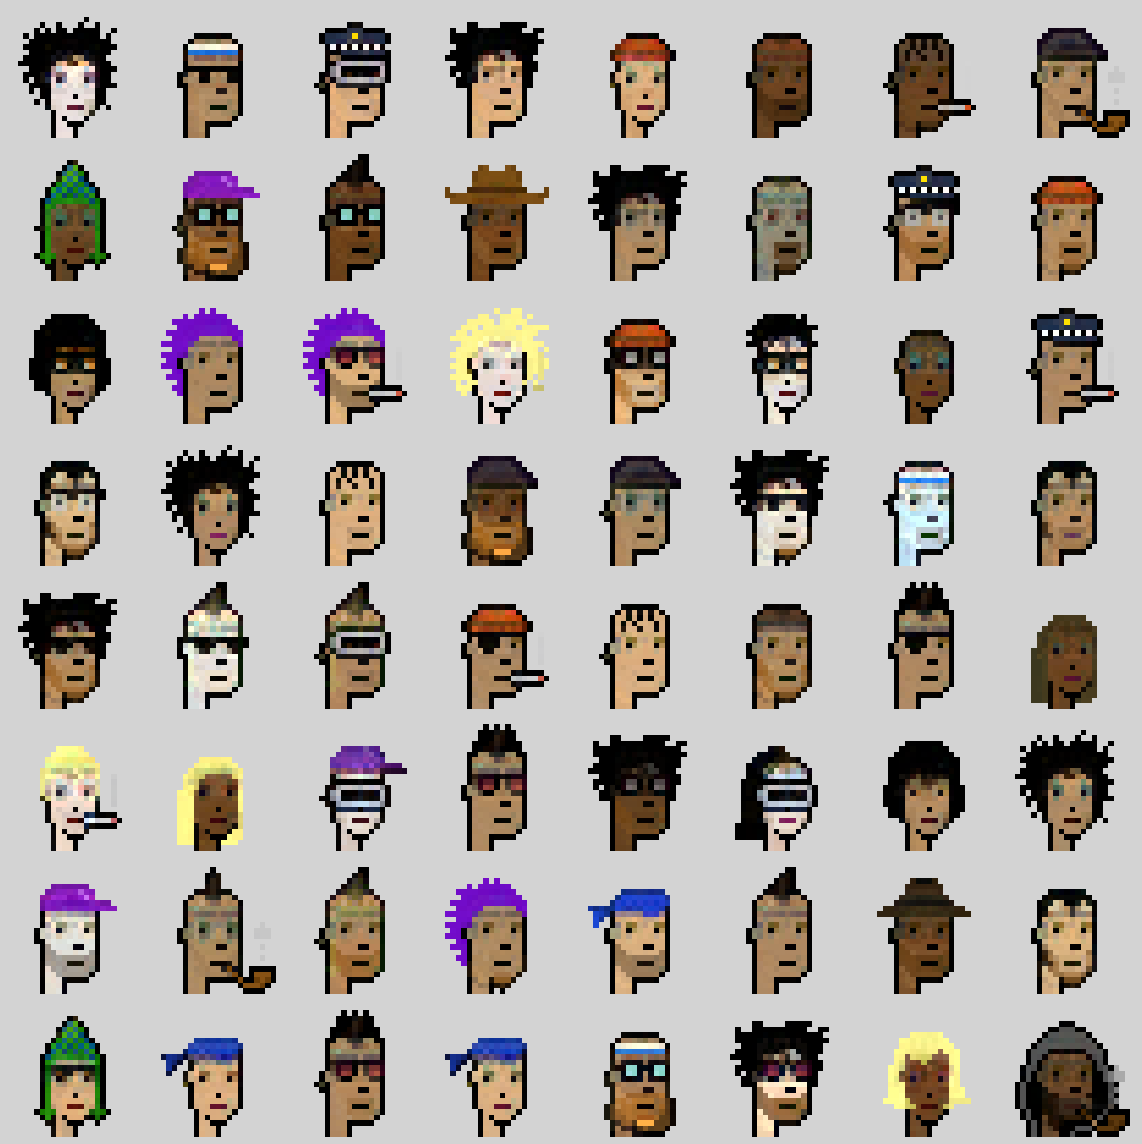

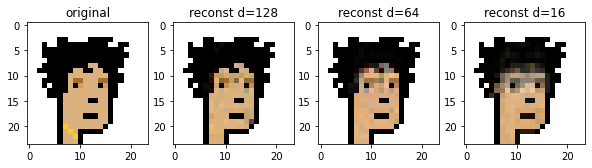

In [37]:
# 2d
faces_recon_16 = np.dot(W_16,H_16).reshape(24,24,3,N) #Recreate the original matrix using W and H.                                                      
faces_recon_64 = np.dot(W_64,H_64).reshape(24,24,3,N) #Reshapes the matrix to work with our plot function 
faces_recon_128 = np.dot(W_128,H_128).reshape(24,24,3,N) 



faces_opacity = faces_opacity.reshape(24,24,1,N) #adds opacity
faces_recon_16 = np.concatenate((faces_recon_16, faces_opacity), axis = 2)
faces_recon_64 = np.concatenate((faces_recon_64, faces_opacity), axis = 2)
faces_recon_128 = np.concatenate((faces_recon_128, faces_opacity), axis = 2)


 #Sets all pixelvalues > 1.0 to 1.0
faces_recon_64[faces_recon_64>1.0] = 1.0
faces_recon_16[faces_recon_16>1.0] = 1.0
faces_recon_128[faces_recon_128>1.0] = 1.0



print("                    Reconstructed image, d = 64")
plotimgs(faces_recon_64, 8, filename="punks.png") #Plotting for d = 64

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.set_title("original")
ax2.set_title("reconst d=128")
ax3.set_title("reconst d=64")
ax4.set_title("reconst d=16")
ax1.imshow(faces[:,:,:, 3])
ax2.imshow(faces_recon_128.reshape(24,24,4,N)[:,:,:, 3])
ax3.imshow(faces_recon_64.reshape(24,24,4,N)[:,:,:, 3])
ax4.imshow(faces_recon_16.reshape(24,24,4,N)[:,:,:, 3])
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()



For $d = 64 $ the restored image from the $H$ and $W $matrixes are quite similar to the original image. We can clearly see that the images correspond to each other, and one would be able to pick out the original image from the reconstructed image. 
When it comes to deviations we see that all the reconstructed cryptopunks lose their uniform skin color and instead have skin consisting of pixels close in color to their original color. In addition, small features are lost or heavily faded. Most earrings are gone in the reconstruction. Features that occupy few pixels dissapear first because they have a lower impact towards the $|A-WH|$ norm.


We also show a comparison of a reconstructed cryptopunk with different $d$-values.
The results are as expected, bigger d-values give better reconstructions. In this instance we can argue that going from 64 to 128 is redundant in terms of accuracy. With the naked eye at least, the difference is negligible, but the norm will certainly be lower. 16 to 64, however, provides significant value, as it gets the hair right as well as the color of the glasses. The colors in general are also improved.

In terms of data storage we can compare how useful the methods are at reducing the amount of data. We do this by comparing the number of elements in $W$ and $H$ to the number of elements in the original matrix.

For $d = 16$:
 
$$ W = 16 \cdot 1728 , H = 16 \cdot 500 $$ 

$$ \frac{W + H}{original matrix} = \frac {27648 + 8000}{864000} \approx 0.04 $$

For d = 64

$$ W = 64 \cdot 1728 , H = 64 \cdot 500 $$ 

$$ \frac{W + H}{original matrix} = \frac {221184+ 64000}{864000} \approx 0.17 $$

Effectively a reduction of 96 % of the data for d = 16, and 83 % for d = 64. This shows that NMF can be a highly useful tool for data reduction. It also higlights the fact that you have to choose how much you want to reduce your data, based on how important accurate reconstruction are to you.




As stated the error will be bigger for larger d-values. We now compute the error for different d-values as a function of iterations to show this:

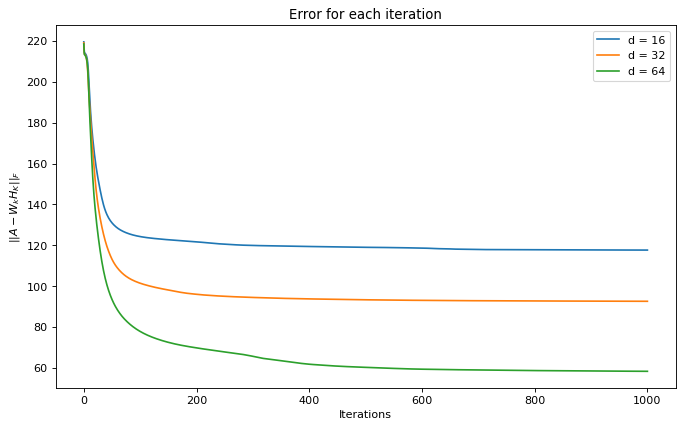

In [31]:
#2e


plt.figure(figsize=(10, 6), dpi=80) #Plotting 
plt.title("Error for different ")
plt.plot(t,diff_16,label= "d = 16")
plt.plot(t,diff_32, label= "d = 32")
plt.plot(t,diff_64, label= "d = 64")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('$||A-W_k H_K||_F$')
plt.show()

The results are as expected. The differences decrease quickly for all $d$-values iterations in the beginning. After 100 iterations the error values have stabilized at their respective values. This is a result of the limitations on $W$ and $H$ to store information that we saw earlier. The lower $d$-values do not yield enough elements in $W$ to provide as accurate an image. Conversely higher $d$-values store more details in $W$ and create more accurate reconstructions.



To display this even more clearly we choose to plot the norm $||A-W_k H_K||_F$ after 1000 iterations as a function of $d$. With $d$ = [16,32,64,128,256,512].




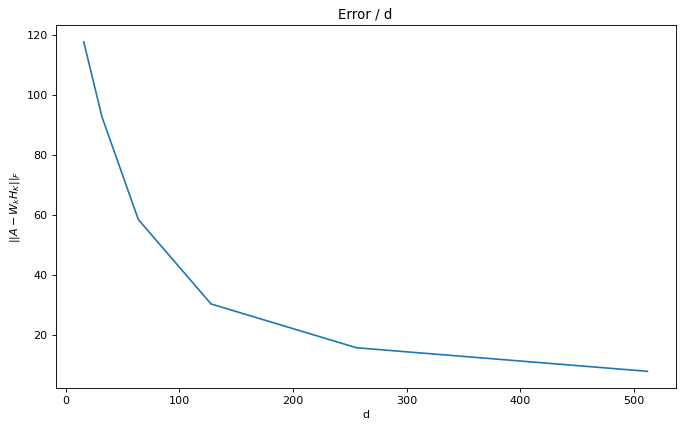

In [32]:
#2f


d_list_orig = [d1,d2,d3,d4,d5,d6] 
error_list = [diff_16[-1],diff_32[-1],diff_64[-1],diff_128[-1],diff_256[-1],diff_512[-1]] #We use the same values as before

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Error / d")
plt.plot(d_list_orig,error_list)
plt.xlabel("d")
plt.ylabel("$||A-W_k H_K||_F$")
plt.show()





We see the same pattern as before, the error decreases as $d$ increases. One thing we notice here that was not as clear before is that the curve grows less steep as $d$ grows, in other words the rate of change decreases. This is not surprising. First of all, the error cannot go below 0, so the rate of change obviously has to decrease. What actually happens, is that as $d$ grows, there eventually are fewer significant details to pick up in $W$, and the benefit of bigger $W$ and $H$ is much lower. Because almost all of the features necessary to reconstruct the images will already be stored in $W$.

In the next part of the project we add noise, which is commonly encountered in data processing. We illustrate and explain the concepts of under- and overfitting. This will reveal that increasing our $d$-value is not guaranteed to increase the accuracy of reconstructions, as it has before. This is a consequence of the noise in our data.


<h2> NMF as a denoising tool </h2>



Noise is an unwanted distortian of a signal. Noisy data contains the true data with some amount of additional meaningless information. For images this usually means a misscoloring of pixels in the image. There are many ways to eliminate or reduce noise in data. In the rest of this project we will see how the NMF-algorithm can be used to accomplish this.

When we use NMF to denoise data, the algorithm functions exactly as before. The noise reduction comes from the fact that each element in $W$ can be considered as the mean of stochastic variables, which has lower variance than the original variables. The extent of the noise reduction depends on our choice of $d$, as we will see later.

First, we see how noisy affects the quality of our data. We create the matrix $A_{noisy} = A +\sigma E$.

Where $A$ is our original matrix and $E$ is a matrix with the same shape as A, but with elements from a standard normal distribution.
The constant $\sigma$ is in our case set equal to $0.1$. The matrix $E$ is also nonzero only where $A$ is nonzero, meaning we only add noise to nonzero elements of $A$



In [16]:
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces



                                 A_noisy, sigma=0.1


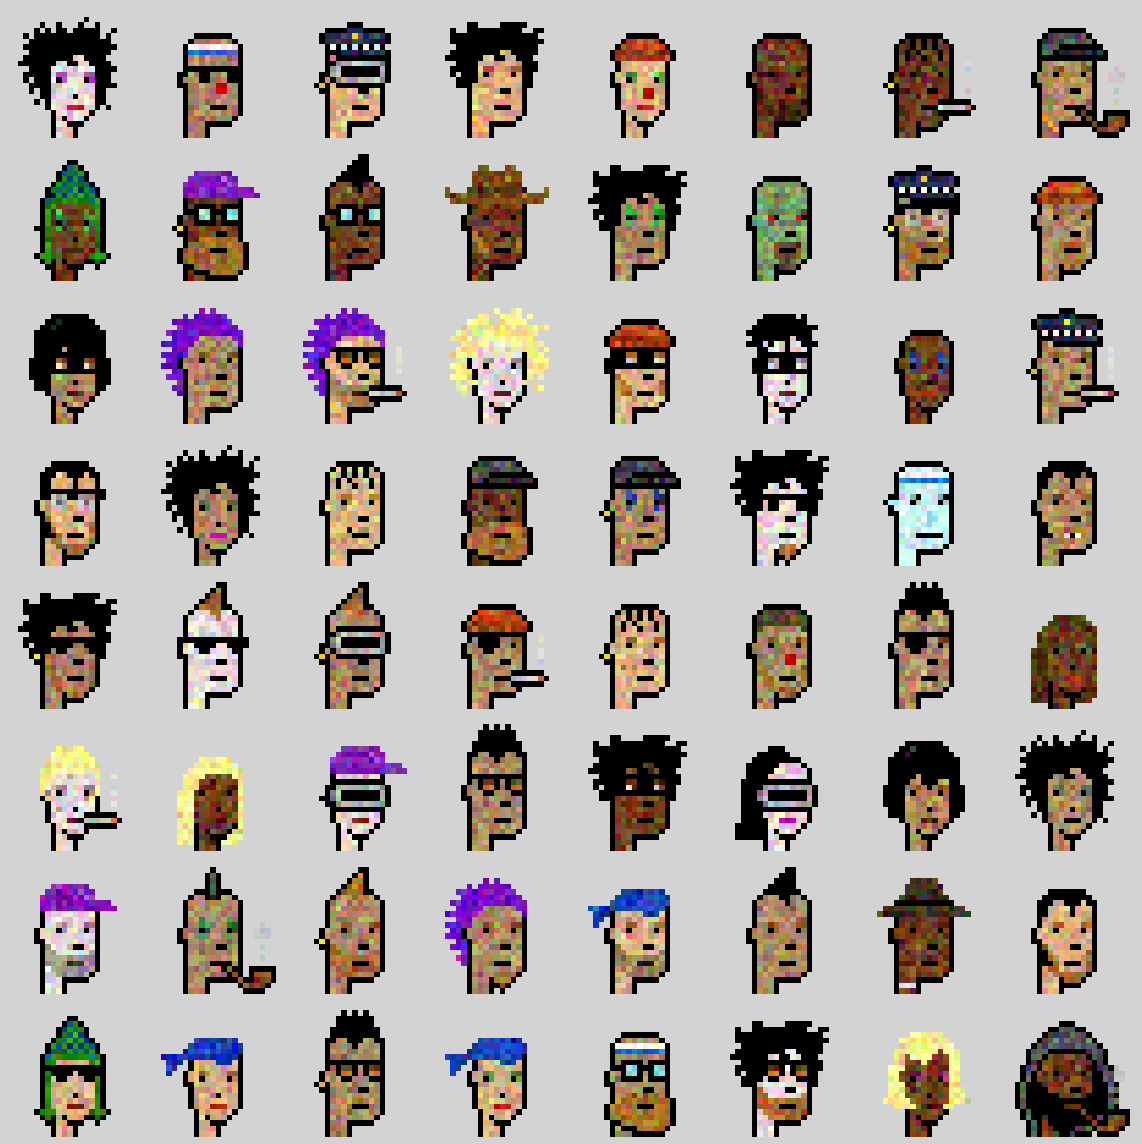

Frobenius norm of $A-A_{noisy}:  59.1739941048387


In [33]:
#3a

noisy_faces = add_noise(faces_reshaped) #We make a noisy matrix
faces_opacity = faces[:,:,3,:]


# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity
print('                                 A_noisy, sigma=0.1'  )
plotimgs(noisy_faces_with_opacity)

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped)
print('Frobenius norm of $A-A_{noisy}: ' , noise_residual)



As we see the noise has pretty big impact when it comes to distorting the images, but the patterns are still easy to spot.
The error between the original matrix $A$ and the matrix with applied noise is about 60. This value will be useful as a comparison for the next step when testing the NMF-denoising with different $d$-values.

We test the denoising by plotting the columns of $W$ and the reconstructions

In [18]:
#3b

W_noisy, H_noisy, diff_noisy = NMF(noisy_faces,64)
W_noisy_300, H_noisy_300, diff_noisy300 = NMF(noisy_faces, 300)
W_noisy_500, H_noisy_500, diff_noisy500 = NMF(noisy_faces, 500)
W_noisy[W_noisy>1.0] = 1.0

                                W_noisy matrix, for d = 64


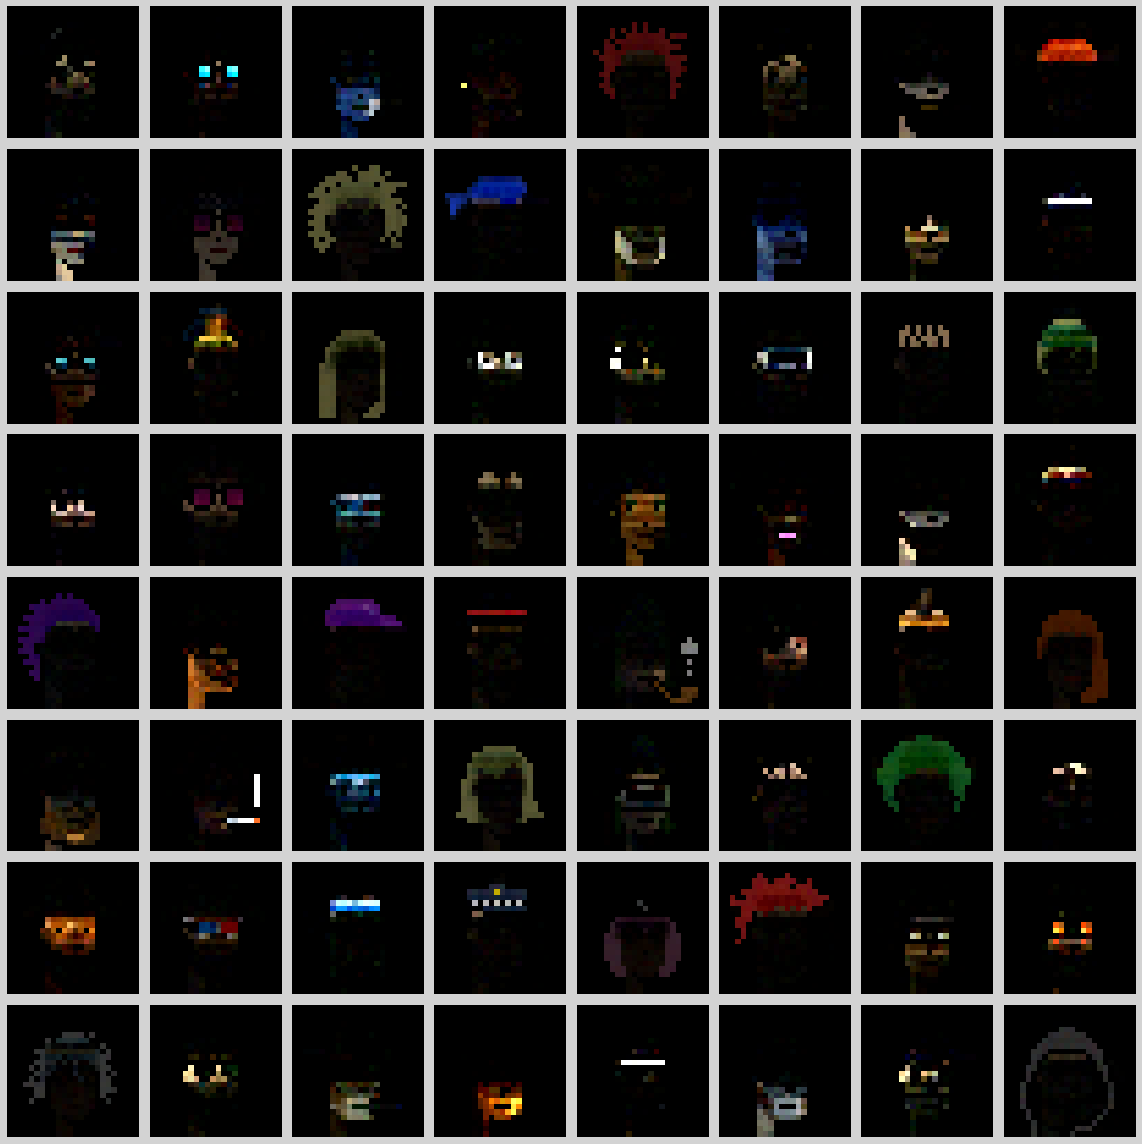

In [35]:
print('                                W_noisy matrix, for d = 64'  )
plotimgs(W_noisy.reshape(24,24,3,64), 8, filename="punks.png")

[Comparison with W for the original matrix](#orig) 

The images plotted above represent the columns of $W$ made the from noisy images. The reconstructed matrix $W_{noisy} $ from the noisy image is quite similar to the $ W $ constructed from the original matrix. The noise is reduced, especially for the single colored attributes. We can still see some noise on larger attributes like faces, but this is not very severe. The way NMF picks up the main features while not picking up much of the noise shows us why the NMF is useful for denoising.



                           Reconstructed noisy image, for d = 64


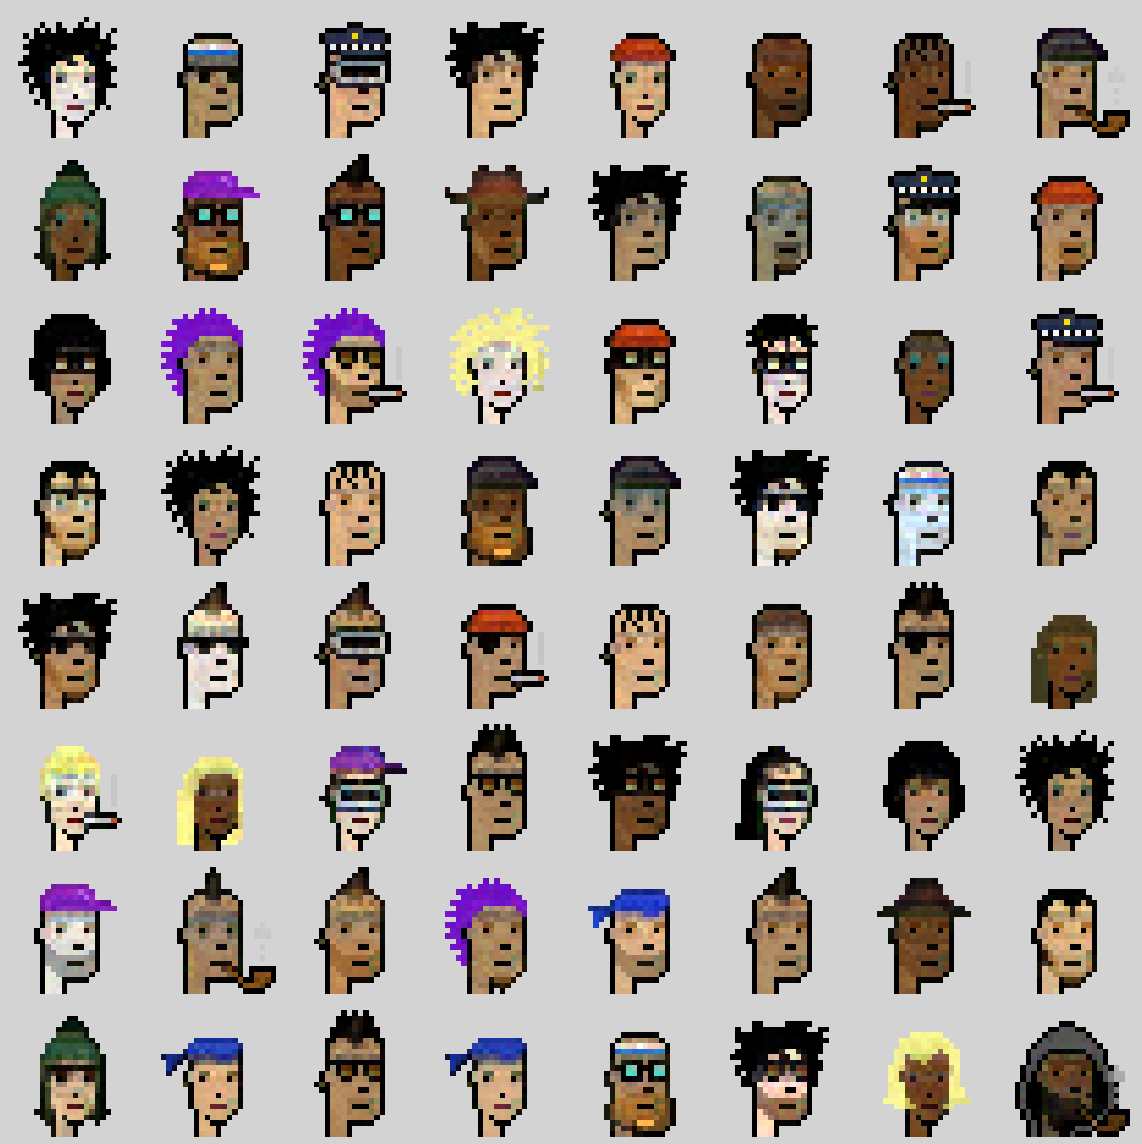

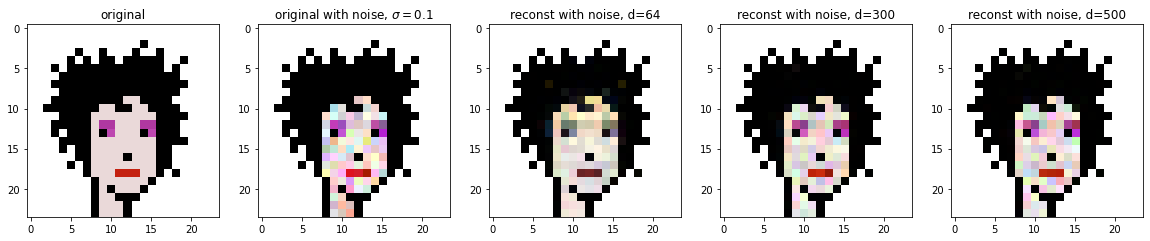

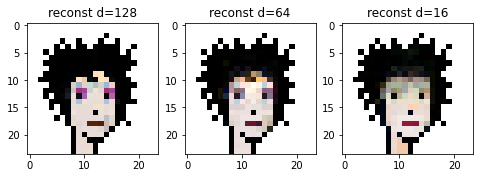

In [36]:
faces_noisy_recon = np.dot(W_noisy, H_noisy).reshape(24,24,3,N)
faces_noisy_recon300 = np.dot(W_noisy_300, H_noisy_300).reshape(24,24,3,N)
faces_noisy_recon500 = np.dot(W_noisy_500, H_noisy_500).reshape(24,24,3,N)


faces_noisy_recon[faces_noisy_recon>1.0]=1.0 #Sets all pixelvalues > 1.0 to 1.0
faces_noisy_recon300[faces_noisy_recon300>1.0]=1.0
faces_noisy_recon500[faces_noisy_recon500>1.0]=1.0


noisy_faces_with_opacity_64 = np.zeros((24,24,4,N)) #Adds opacity to the recreated images
noisy_faces_with_opacity_64[:,:,:3,:] = faces_noisy_recon
noisy_faces_with_opacity_64[:,:,3,:] = faces_opacity 

noisy_faces_with_opacity_300 = np.zeros((24,24,4,N)) #Adds opacity to the recreated images
noisy_faces_with_opacity_300[:,:,:3,:] = faces_noisy_recon300
noisy_faces_with_opacity_300[:,:,3,:] = faces_opacity 

noisy_faces_with_opacity_500 = np.zeros((24,24,4,N)) #Adds opacity to the recreated images
noisy_faces_with_opacity_500[:,:,:3,:] = faces_noisy_recon500
noisy_faces_with_opacity_500[:,:,3,:] = faces_opacity 



print('                           Reconstructed noisy image, for d = 64'  )
plotimgs(noisy_faces_with_opacity_64,8, filename="punks.png") #plotting


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.set_title("original")
ax2.set_title("original with noise, $\sigma = 0.1 $")
ax3.set_title("reconst with noise, d=64")
ax4.set_title("reconst with noise, d=300")
ax5.set_title("reconst with noise, d=500")
ax1.imshow(faces.reshape(24,24,4,N)[:,:,:, 0])
ax2.imshow(noisy_faces_with_opacity[:,:,:,0])
ax3.imshow(noisy_faces_with_opacity_64[:,:,:, 0])
ax4.imshow(noisy_faces_with_opacity_300[:,:,:, 0])
ax5.imshow(noisy_faces_with_opacity_500[:,:,:, 0])
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_title("reconst d=128")
ax2.set_title("reconst d=64")
ax3.set_title("reconst d=16")
ax1.imshow(faces_recon_128.reshape(24,24,4,N)[:,:,:, 0])
ax2.imshow(faces_recon_64.reshape(24,24,4,N)[:,:,:, 0])
ax3.imshow(faces_recon_16.reshape(24,24,4,N)[:,:,:, 0])
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

The effectiveness of NMF is revealed even more. We get a significant noise reduction from the noisy images. Colors are now very close to normal, and dont differ much from our reconstruction without noise. We also show that increasing $d$ will not necessarily increase accuracy, as $d=64$ provides a less noisy reconstruction than $d= 300$ and $d =500$. However the bigger $d$-values have picked up a feature that $64$ did not, namely the hair color. 

This brings us to the concepts of over- and underfitting. $d = 64$ is low-dimensional enough that only features are picked up in W and not , but it might not be able to pick up all features. This is called underfitting, when the method is not complex enough to pick up all the underlying details in the data. The larger $d$-values on the other hand, will start learning from the noise, and include more noise in $W$. This is called overfitting. We are basically telling the method to pick up more patterns than are actually present in the data. The method is now reconstructing the noise as well, which is hurting our results.

We illustrate these concepts in our next figure by plotting the final error as a function of $d$

In [21]:
def NMF_2(V,A, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    New NMF that calculates the Frobenius norm between the constructed
    WH from A_noisy , and the original image A.
    The function takes in a matrix as well as the size d of the approximation matrices.
    By using Lee and Seung’s multiplicative update rule for NMF we iterate such that
    H and W converge towards an acceptable approximation.
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """
    m,n=len(V),len(V[0])
    if seed != 0:
        np.random.seed(seed)
    W=np.random.uniform(0,1,(m,d))  #Making matrices W and H of correct sizes with values between 0 and 1
    W=np.sqrt(V.mean()/d)*W         #Scaling to the size of input matrix
    H=np.random.uniform(0,1,(d,n))
    H=np.sqrt(V.mean()/d)*H
    error_list=np.zeros(maxiter)
    for k in range(maxiter):
        H=H*(W.T @ V)/(W.T @ W @ H+delta) 
        W=W*(V @ H.T)/(W @ H @ H.T+delta) 
        error_list[k]=np.linalg.norm(A-np.dot(W,H),'fro')
    return W, H, error_list



In [22]:

#3c
'''
Making a list containging the Frobenius norm in the last iteration for different
d-values, and a list containing the d-values.
'''
diff_list = []
d_list = []

for d in range (16,500,30) :
    d_val = int (d)
    W, H, diff_vals = NMF_2(noisy_faces, faces_reshaped, d_val)
    diff_list.append(diff_vals[-1])
    d_list.append(d_val)
    print(d_val)


16
46
76
106
136
166
196
226
256
286
316
346
376
406
436
466
496


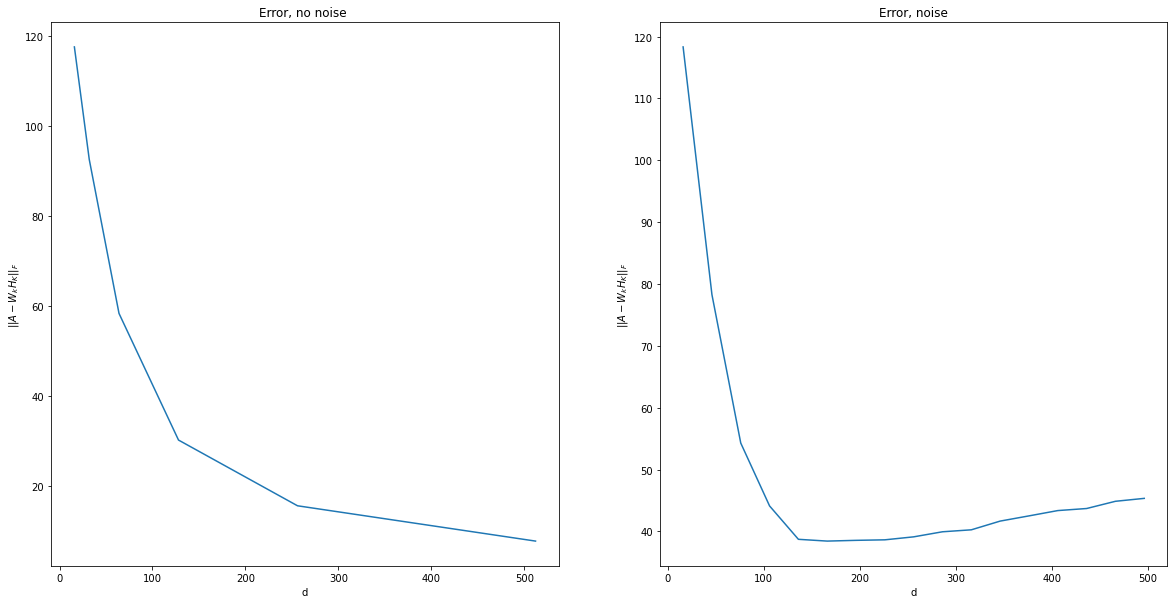

In [23]:


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Error, no noise ")
ax2.set_title("Error, noise")
ax1.plot(d_list_orig, error_list)
ax2.plot(d_list,diff_list)
ax1.set_ylabel('$||A-W_k H_K||_F$')
ax1.set_xlabel("d")
ax2.set_ylabel('$||A-W_k H_K||_F$')
ax2.set_xlabel("d")
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()






We see that the plot matches our expectations. Underfitting occurs in the first part of the figure, here the method is too simple to account for all the image features. As we have explained before, this is because $W$ doesnt catch all the features in the dataset, and has to compromise when reconstructing the images. In the right part of the figure we see that the error is increasing. This is where the overfitting is happening. The randomness from the noise is picked up by the model and considered as a part of the data. This in turn has a negative effect on the precision of the reconstructions. As we know, there is no noise in the original dataset, but the NMF now thinks that it is, and yields flawed results

The sweet spot is somewhere between 160 and 200. Here the method is a good fit for the dataset, and we see the lowest amount of error in the figure. At this point $W$ contains the necessary components to produce very good reconstructions without containing much noise. Lowering $d$ from this point will cause it too miss out on some details, increasing the error. While increasing $d$ will cause it to start picking up noise, also increasing the error.

We also see that the error for the most part is less than 60, which we calculated $||A-A_{noisy}||_F$ to be. This shows that the method can reduce the error in the signal, while also reducing the amount of data.

<h2> Conclusion </h2>

This project provides an introduction to data compression and denoising, as well as one of the methods used to implement them, NMF. We examined the properties of the NMF algorithm by testing it on smaller matrices, showing how the error behaves for different values. For instance we showed that having $d$ equal to the rank of the matrix gives a lower error than other d-values.

The more important results came with regards to data compression and denoising. We discovered that the the algorithm can reduce the amount of data considerably, while still preserving the essential parts of it. Nevertheless, it is not a lossless form of compression, as the reconstruction were not exact copies of the originals. For images, however, this is not that harmful, so it is certainly a useful method. The method also allows for some flexibility, in that you can choose how much data you want to reduce based on how much you value accuracy in your reconstructions. Another important aspect of the method, is that it makes the data easier to understand, by reducing the images to their building blocks. What was originally an array of faces, became an array of features from which the faces were made, stored in $W$

NMF is also a denoising tool, as we showed in the latter part of our project. There are some complexities with regards to noise that we neglected to include, but we were able to show the principles. The results were impressive, considering that the method was still reducing the dimensionality of the data. This also allowed us to explain underfitting and overfitting, important topics in machine learning. We were able to demonstrate these concepts by varying the dimension in our NMF

These observations allow us to assert the usefullness of the method. In a data-centered world, where the amount of data is increasing incessantly, having methods to compress and clarify data is critical. NMF has both these uses. Understanding large quantities of data is perhaps equally important, and NFT also allows us to do this. Because of this, going forward, NMF and other types of dimensionality reduction are important topics for both mathemathical and practical reasons. 


